<center><h1>DSCI-552 Homework 2</h1></center>
<br>
<center><font size="4">Name: Wenhao Zhang</font></center>
<center><font size="4">USC ID: 7036767117</font></center>

## 1. Combined Cycle Power Plant Data Set

### (a) Download and read data

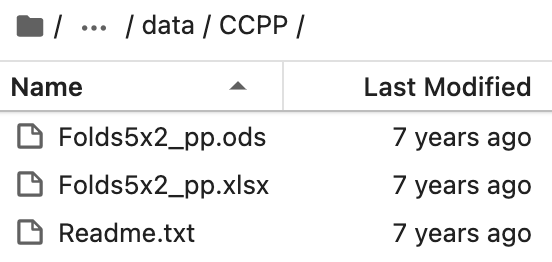

Have downloaded it!

And let us read data here.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from statsmodels.tools.eval_measures import mse
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import MinMaxScaler

data = pd.read_excel("../data/CCPP/Folds5x2_pp.xlsx", sheet_name='Sheet1', header=0)
df = pd.DataFrame(data)
df.rename(columns={'AT': 'Temperature',
                   'V': 'Exhaust_Vacuum',
                   'AP': 'Ambient_Pressure',
                   'RH': 'Relative_Humidity',
                   'PE': 'Energy_Output'}, inplace=True)
df

,Temperature,Exhaust_Vacuum,Ambient_Pressure,Relative_Humidity,Energy_Output
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


### (b) Exploring the data:


#### i. How many rows are in this data set? How many columns? What do the rows and columns represent?

**ANSWER**: As you can see above, there are **9568 rows** and **5 columns** in this data set.

Rows represent **instances** of the data set.

Temperature (AT), Exhaust_Vacuum (V), Ambient_Pressure (AP), and Relative_Humidity (RH) represent four **features** of the data set.

Energy_Output (PE) represents the **label** of the data set.

#### ii. Make pairwise scatterplots of all the varianbles in the data set including the predictors (independent variables) with the dependent variable. Describe your findings.

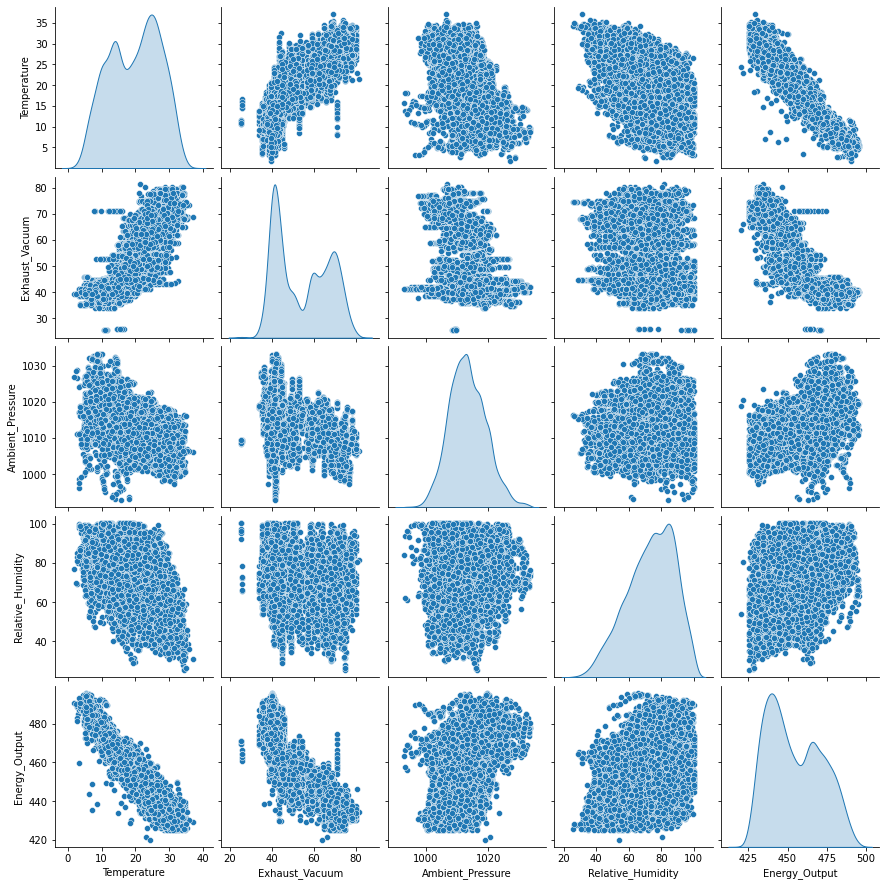

In [2]:
sns.pairplot(df, diag_kind='kde')

**FINDINGS**: Overall, Temperature is inversely proportional to Energy Output. Exhaust Vacuum is also inversely proportional to Energy Output to some extent. However, I cannot see very significant association between Ambient Pressure with Energy Output or between Relative Humidity with Energy Output.

#### iii. What are the mean, the median, range, first and third quartiles, and interquartile ranges of each of the variables in the dataset? Summarize them in a table.

In [3]:
df_des = df.describe()

# Use apply() to go through all the columns and get corresponding range and interquartile range for them
df_range = df_des.apply(lambda x: x['max']-x['min'])
df_interq_range = df_des.apply(lambda x: x['75%']-x['25%'])

df_range.name = 'range'
df_interq_range.name = 'interquartile range'
df_des = df_des.append(df_range)
df_des = df_des.append(df_interq_range)
df_des.rename(index={'25%': 'first quartile',
                     '50%': 'median',
                     '75%': 'third quartile'}, inplace=True)
df_des = df_des.drop(index=['count', 'std', 'min', 'max'])
print(df_des)

                     Temperature  Exhaust_Vacuum  Ambient_Pressure  \
mean                   19.651231       54.305804       1013.259078   
first quartile         13.510000       41.740000       1009.100000   
median                 20.345000       52.080000       1012.940000   
third quartile         25.720000       66.540000       1017.260000   
range                  35.300000       56.200000         40.410000   
interquartile range    12.210000       24.800000          8.160000   

                     Relative_Humidity  Energy_Output  
mean                         73.308978     454.365009  
first quartile               63.327500     439.750000  
median                       74.975000     451.550000  
third quartile               84.830000     468.430000  
range                        74.600000      75.500000  
interquartile range          21.502500      28.680000  


### (c) For each predictor, fit a simple linear regression model to predict the response. Describe your results.

In [4]:
y = df['Energy_Output']
X_T = df['Temperature']
X_V = df['Exhaust_Vacuum']
X_AP = df['Ambient_Pressure']
X_RH = df['Relative_Humidity']

# Model for Temperature
X_T_constant = sm.add_constant(X_T, prepend=True)
model_T = sm.OLS(y, X_T_constant)
res_T = model_T.fit()

# Model for Exhaust Vacuum
X_V_constant = sm.add_constant(X_V, prepend=True)
model_V = sm.OLS(y, X_V_constant)
res_V = model_V.fit()

# Model for Ambient Pressure
X_AP_constant = sm.add_constant(X_AP, prepend=True)
model_AP = sm.OLS(y, X_AP_constant)
res_AP = model_AP.fit()

# Model for Relative Humidity
X_RH_constant = sm.add_constant(X_RH, prepend=True)
model_RH = sm.OLS(y, X_RH_constant)
res_RH = model_RH.fit()

print("Model for Temperature:")
print(res_T.summary().tables[1],'\n')
print("Model for Exhaust Vacuum:")
print(res_V.summary().tables[1],'\n')
print("Model for Ambient Pressure:")
print(res_AP.summary().tables[1],'\n')
print("Model for Relative Humidity:")
print(res_RH.summary().tables[1])

Model for Temperature:
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         497.0341      0.156   3177.280      0.000     496.727     497.341
Temperature    -2.1713      0.007   -291.715      0.000      -2.186      -2.157

Model for Exhaust Vacuum:
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            517.8015      0.378   1370.218      0.000     517.061     518.542
Exhaust_Vacuum    -1.1681      0.007   -172.402      0.000      -1.181      -1.155

Model for Ambient Pressure:
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -1055.2610     25.459    -41.449      0.000   -1105.167   -1005.355
Ambient_Pressu

#### In which of the models is there a statistically significant association between the predictor and the response?

**ANSWER**: Since the p-values of all models are close to 0, we can tell that **in all models** there is a statistically significant association between the predictor and the response.

#### Create some plots to back up your assertions.

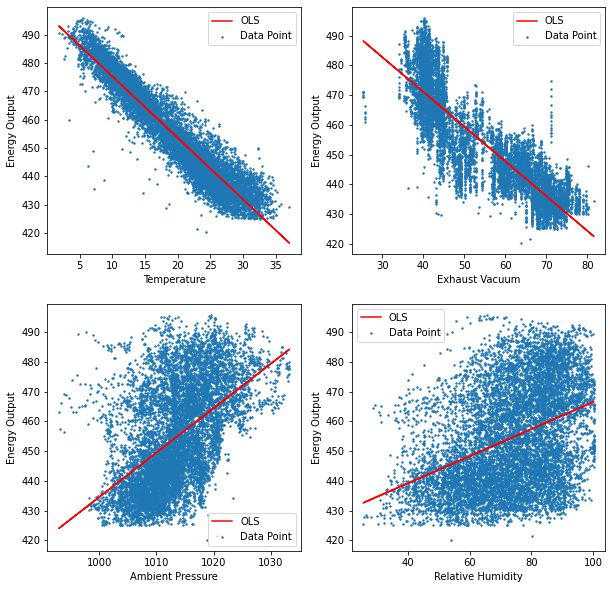

In [5]:
y_T_predicted = res_T.predict(X_T_constant)
y_V_predicted = res_V.predict(X_V_constant)
y_AP_predicted = res_AP.predict(X_AP_constant)
y_RH_predicted = res_RH.predict(X_RH_constant)

plt.figure(figsize=[10,10])
# Plot for Temperature
plt.subplot(221)
plt.scatter(X_T, y, label='Data Point', marker="o", s=2)
plt.plot(X_T, y_T_predicted, label='OLS', color='red')
plt.xlabel('Temperature')
plt.ylabel('Energy Output')
plt.legend()
# Plot for Exhaust Vacuum
plt.subplot(222)
plt.scatter(X_V, y, label='Data Point', marker="o", s=2)
plt.plot(X_V, y_V_predicted, label='OLS', color='red')
plt.xlabel('Exhaust Vacuum')
plt.ylabel('Energy Output')
plt.legend()
# Plot for Ambient Pressure
plt.subplot(223)
plt.scatter(X_AP, y, label='Data Point', marker="o", s=2)
plt.plot(X_AP, y_AP_predicted, label='OLS', color='red')
plt.xlabel('Ambient Pressure')
plt.ylabel('Energy Output')
plt.legend()
# Plot for Relative Humidity
plt.subplot(224)
plt.scatter(X_RH, y, label='Data Point', marker="o", s=2)
plt.plot(X_RH, y_RH_predicted, label='OLS', color='red')
plt.xlabel('Relative Humidity')
plt.ylabel('Energy Output')
plt.legend()

#### Are there any outliers that you would like to remove from your data for each of these regression tasks?

**ANSWER**: There are outliers in all four models. Specific information is shown below.

Cook's Distance summarizes the changes in the fitted values of other samples after removing a certain data point, which is equivalent to combining the information of residuals and leverage values. The greater the Cook Distance of a data point, the greater its influence on the entire regression model.

There are several traditional threshold for Cook's Distance, such as 1, 4/(N-k-1), and 4/N. For this dataset, the latter two are very close, and if I set threshold to 1, there will be no influential data points. I checked the results when threshold is set to 4/N and it turned out many obviously strange data points are counted as outliers. I think this threshold works well so I keep it. 

Outliers of Model for Temperature:
21       5.41
57       5.91
61      29.01
87      32.72
89      35.56
        ...  
9475    30.26
9477    34.03
9484    27.34
9542     5.01
9559    26.22
Name: Temperature, Length: 458, dtype: float64


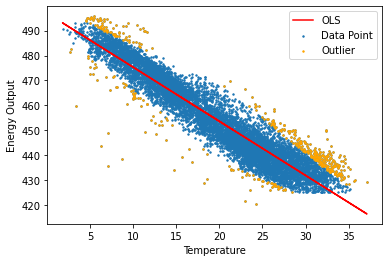

In [6]:
# Find Outliers of Model for Temperature

# Create instance of influence
influence = res_T.get_influence()
# Get Cook's Distance
cook = influence.cooks_distance[0]

model_T_outliers = pd.concat([df, pd.Series(cook, name='cook')], axis=1)
model_T_outliers = model_T_outliers[model_T_outliers['cook']>0.0004] # threshold set to 4/N = 0.0004
X_T_outliers = model_T_outliers['Temperature']
y_T_outliers = model_T_outliers['Energy_Output']
print('Outliers of Model for Temperature:')
print(X_T_outliers)

# Plot for Temperature
plt.scatter(X_T, y, label='Data Point', marker="o", s=2)
plt.scatter(X_T_outliers, y_T_outliers, label='Outlier', color='orange', marker="o", s=2)
plt.plot(X_T, y_T_predicted, label='OLS', color='red')
plt.xlabel('Temperature')
plt.ylabel('Energy Output')
plt.legend()

Outliers of Model for Exhaust Vacuum:
2       39.40
21      40.07
24      48.60
47      43.43
57      39.33
        ...  
9394    39.72
9404    44.89
9407    74.99
9471    43.77
9509    25.36
Name: Exhaust_Vacuum, Length: 473, dtype: float64


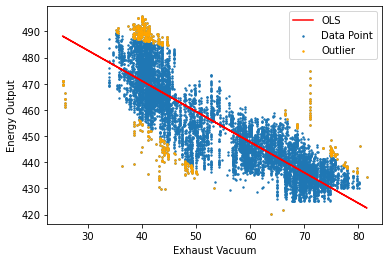

In [7]:
# Find Outliers of Model for Exhaust Vacuum

# Create instance of influence
influence = res_V.get_influence()
# Get Cook's Distance
cook = influence.cooks_distance[0]

model_V_outliers = pd.concat([df, pd.Series(cook, name='cook')], axis=1)
model_V_outliers = model_V_outliers[model_V_outliers['cook']>0.0004] # threshold set to 4/N = 0.0004
X_V_outliers = model_V_outliers['Exhaust_Vacuum']
y_V_outliers = model_V_outliers['Energy_Output']
print('Outliers of Model for Exhaust Vacuum:')
print(X_V_outliers)

# Plot for Exhaust Vacuum
plt.scatter(X_V, y, label='Data Point', marker="o", s=2)
plt.scatter(X_V_outliers, y_V_outliers, label='Outlier', color='orange', marker="o", s=2)
plt.plot(X_V, y_V_predicted, label='OLS', color='red')
plt.xlabel('Exhaust Vacuum')
plt.ylabel('Energy Output')
plt.legend()

Outliers of Model for Ambient Pressure:
21      1019.16
22      1008.52
57      1010.18
74      1008.82
114     1001.24
         ...   
9440    1001.86
9459    1008.43
9483    1005.24
9521     998.27
9542    1003.69
Name: Ambient_Pressure, Length: 324, dtype: float64


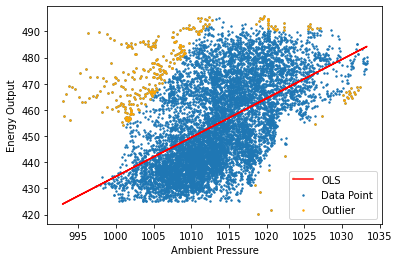

In [8]:
# Find Outliers of Model for Ambient Pressure

# Create instance of influence
influence = res_AP.get_influence()
# Get Cook's Distance
cook = influence.cooks_distance[0]

model_AP_outliers = pd.concat([df, pd.Series(cook, name='cook')], axis=1)
model_AP_outliers = model_AP_outliers[model_AP_outliers['cook']>0.0004] # threshold set to 4/N = 0.0004
X_AP_outliers = model_AP_outliers['Ambient_Pressure']
y_AP_outliers = model_AP_outliers['Energy_Output']
print('Outliers of Model for Ambient Pressure:')
print(X_AP_outliers)

# Plot for Ambient Pressure
plt.scatter(X_AP, y, label='Data Point', marker="o", s=2)
plt.scatter(X_AP_outliers, y_AP_outliers, label='Outlier', color='orange', marker="o", s=2)
plt.plot(X_AP, y_AP_predicted, label='OLS', color='red')
plt.xlabel('Ambient Pressure')
plt.ylabel('Energy Output')
plt.legend()

Outliers of Model for Relative Humidity:
8       41.25
15      43.08
16      48.84
21      64.77
48      50.00
        ...  
9204    98.84
9361    90.20
9431    85.67
9469    93.39
9495    99.27
Name: Relative_Humidity, Length: 287, dtype: float64


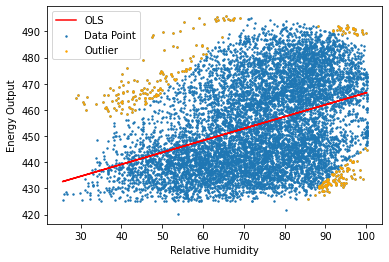

In [9]:
# Find Outliers of Model for Relative Humidity

# Create instance of influence
influence = res_RH.get_influence()
# Get Cook's Distance
cook = influence.cooks_distance[0]

model_RH_outliers = pd.concat([df, pd.Series(cook, name='cook')], axis=1)
model_RH_outliers = model_RH_outliers[model_RH_outliers['cook']>0.0004] # threshold set to 4/N = 0.0004
X_RH_outliers = model_RH_outliers['Relative_Humidity']
y_RH_outliers = model_RH_outliers['Energy_Output']
print('Outliers of Model for Relative Humidity:')
print(X_RH_outliers)

# Plot for Relative Humidity
plt.scatter(X_RH, y, label='Data Point', marker="o", s=2)
plt.scatter(X_RH_outliers, y_RH_outliers, label='Outlier', color='orange', marker="o", s=2)
plt.plot(X_RH, y_RH_predicted, label='OLS', color='red')
plt.xlabel('Relative Humidity')
plt.ylabel('Energy Output')
plt.legend()

### (d) Fit a multiple regression model to predict the response using all of the predictors. Describe your results. For which predictors can we reject the null hypothesis H0: βj=0?

In [10]:
X_multi = df.drop(['Energy_Output'], axis=1)
X_multi_constant = sm.add_constant(X_multi)
model_multi = sm.OLS(y, X_multi_constant)
res_multi = model_multi.fit()
print(res_multi.summary().tables[1])

                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               454.6093      9.749     46.634      0.000     435.500     473.718
Temperature          -1.9775      0.015   -129.342      0.000      -2.007      -1.948
Exhaust_Vacuum       -0.2339      0.007    -32.122      0.000      -0.248      -0.220
Ambient_Pressure      0.0621      0.009      6.564      0.000       0.044       0.081
Relative_Humidity    -0.1581      0.004    -37.918      0.000      -0.166      -0.150


**ANSWER**: In this multiple regression model, since all the p-values of the predictors are close to 0, which means they are all statistically significant, we can reject the null hypothesis for all predictors.

### (e) How do your results from 1c compare to your results from 1d?

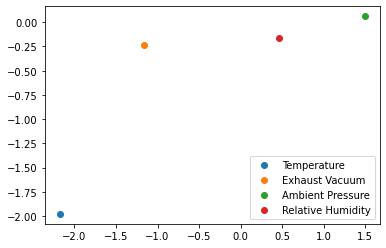

In [11]:
# results.params can return coefs
multi_reg_coeff = list(res_multi.params)
plt.scatter(res_T.params[1], res_multi.params[1], label='Temperature')
plt.scatter(res_V.params[1], res_multi.params[2], label='Exhaust Vacuum')
plt.scatter(res_AP.params[1], res_multi.params[3], label='Ambient Pressure')
plt.scatter(res_RH.params[1], res_multi.params[4], label='Relative Humidity')
plt.legend()

**ANSWER**: The coefficients for Temperature of two models are close. The coefficient for Exhaust Vacuum of multiple regression model is larger than of univariate regression model, but it remains negative. The coefficient for Ambient Pressure of multiple regression model is smaller than of univariate regression model, but it remains positive. The coefficient for Relative Humidity turns from positive to negative when applying multiple regression.

### (f) Is there evidence of nonlinear association between any of the predictors and the response?

In [12]:
# Polynomial Regression for Temperature
X_T = np.array(df['Temperature']).reshape(df.shape[0], 1)
poly = PolynomialFeatures(3) # Set the maximal degree of the polynomial features to 3
X_T_poly = poly.fit_transform(X_T)
model_T = sm.OLS(y, X_T_poly)
res_T = model_T.fit()

# Polynomial Regression for Exhaust Vacuum
X_V = np.array(df['Exhaust_Vacuum']).reshape(df.shape[0], 1)
poly = PolynomialFeatures(3) # Set the maximal degree of the polynomial features to 3
X_V_poly = poly.fit_transform(X_V)
model_V = sm.OLS(y, X_V_poly)
res_V = model_V.fit()

# Polynomial Regression for Ambient Pressure
X_AP = np.array(df['Ambient_Pressure']).reshape(df.shape[0], 1)
poly = PolynomialFeatures(3) # Set the maximal degree of the polynomial features to 3
X_AP_poly = poly.fit_transform(X_AP)
model_AP = sm.OLS(y, X_AP_poly)
res_AP = model_AP.fit()

# Polynomial Regression for Relative Humidity 
X_RH = np.array(df['Relative_Humidity']).reshape(df.shape[0], 1)
poly = PolynomialFeatures(3) # Set the maximal degree of the polynomial features to 3
X_RH_poly = poly.fit_transform(X_RH)
model_RH = sm.OLS(y, X_RH_poly)
res_RH = model_RH.fit()

print("Polynomial Regression Model for Temperature:")
print(res_T.summary().tables[1],'\n')
print("Polynomial Regression Model for Exhaust Vacuum:")
print(res_V.summary().tables[1],'\n')
print("Polynomial Regression Model for Ambient Pressure:")
print(res_AP.summary().tables[1],'\n')
print("Polynomial Regression Model for Relative Humidity:")
print(res_RH.summary().tables[1])

Polynomial Regression Model for Temperature:
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        492.7281      0.673    732.248      0.000     491.409     494.047
x1            -0.6103      0.124     -4.941      0.000      -0.852      -0.368
x2            -0.1251      0.007    -18.199      0.000      -0.139      -0.112
x3             0.0027      0.000     22.594      0.000       0.002       0.003

Polynomial Regression Model for Exhaust Vacuum:
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        554.1468      9.151     60.557      0.000     536.209     572.084
x1            -2.1444      0.509     -4.214      0.000      -3.142      -1.147
x2            -0.0027      0.009     -0.294      0.768      -0.021       0.015
x3             0.0001   5.45e-05     

**ANSWER**: According to p-values, predictors including Temperature, Ambient_Pressure and Relative_Humidity show significant nonlinear association with response both quadratically and cubically. Exhaust_Vacuum does not show clear quadratic nonlinearity (p-value=0.768) but it shows cubic nonlinearity to some extent (p-value=0.014).

### (g) Is there evidence of association of interactions of predictors with the response?

In [13]:
X = df.drop(['Energy_Output'], axis=1)
poly = PolynomialFeatures(2, interaction_only=True)
X_inter = poly.fit_transform(X)
model_inter = sm.OLS(y, X_inter)
res_inter = model_inter.fit()

print(res_inter.summary().tables[1],'\n')
# x1: Temperature
# x2: Exhaust_Vacuum 
# x3: Ambient_Pressure
# x4: Relative_Humidity
# x5: x1*x2
# x6: x1*x3
# x7: x1*x4
# x8: x2*x3
# x9: x2*x4
# x10: x3*x4    

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        685.7825     78.640      8.721      0.000     531.631     839.934
x1            -4.3470      2.373     -1.832      0.067      -8.999       0.305
x2            -7.6749      1.351     -5.682      0.000     -10.323      -5.027
x3            -0.1524      0.077     -1.983      0.047      -0.303      -0.002
x4             1.5709      0.773      2.031      0.042       0.055       3.087
x5             0.0210      0.001     23.338      0.000       0.019       0.023
x6             0.0018      0.002      0.752      0.452      -0.003       0.006
x7            -0.0052      0.001     -6.444      0.000      -0.007      -0.004
x8             0.0068      0.001      5.135      0.000       0.004       0.009
x9             0.0008      0.000      1.716      0.086      -0.000       0.002
x10           -0.0016      0.001     -2.125      0.0

**ANSWER**: Assuming ${\alpha=0.05}$, x5 (Temperature and Exhaust_Vacuum), x7 (Temperature and Relative_Humidity), x8 (Exhaust_Vacuum and Ambient_Pressure), and x10 (Ambient_Pressure and Relative_Humidity) all show evidence of association of interactions since their p-values are less than 0.05. Other combinations do not show significant evidence.

### (h) Can you improve your model using possible interaction terms or nonlinear associations between the predictors and response?

#### Train the regression model on a randomly selected 70% subset of the data with all predictors.

In [14]:
# Split the data set to get training set and test set
y = df['Energy_Output']
X = df.drop(['Energy_Output'], axis=1)
# Randomly select 70% of the data set as training data, rest as test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [15]:
# Linear Regression Model with all predictors
X_train_constant = sm.add_constant(X_train)
X_test_constant = sm.add_constant(X_test)

model_linear = sm.OLS(y_train, X_train_constant)
res_linear = model_linear.fit()
y_train_predict = res_linear.predict(X_train_constant)
y_test_predict = res_linear.predict(X_test_constant)
mse_train = mse(y_train, y_train_predict)
mse_test = mse(y_test, y_test_predict)

print('Linear Regression Model with all predictors:')
print(res_linear.summary().tables[1])
print('MSE of training set:', mse_train)
print('MSE of test set:', mse_test)

Linear Regression Model with all predictors:
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               467.8414     11.502     40.673      0.000     445.293     490.390
Temperature          -2.0044      0.018   -110.340      0.000      -2.040      -1.969
Exhaust_Vacuum       -0.2271      0.009    -26.301      0.000      -0.244      -0.210
Ambient_Pressure      0.0493      0.011      4.416      0.000       0.027       0.071
Relative_Humidity    -0.1600      0.005    -32.337      0.000      -0.170      -0.150
MSE of training set: 20.580839725738702
MSE of test set: 21.239856938225532


#### Also, run a regression model involving all possible interaction terms and quadratic nonlinearities, and remove insignificant variables using p-values.

In [16]:
# Regression Model with all interaction terms and quadratic terms
poly = PolynomialFeatures(2, interaction_only=False)
X_train_poly = poly.fit_transform(X_train)
model_poly = sm.OLS(y_train, X_train_poly)
res_poly = model_poly.fit()

# X_train_poly
print('Regression Model with all interaction terms and quadratic terms:')
print(res_poly.summary().tables[1])

# x1: Temperature
# x2: Exhaust_Vacuum 
# x3: Ambient_Pressure
# x4: Relative_Humidity
# x5: x1^2
# x6: x1*x2
# x7: x1*x3
# x8: x1*x4
# x9: x2^2
# x10: x2*x3
# x11: x2*x4
# x12: x3^2
# x13: x3*x4
# x14: x4^2

Regression Model with all interaction terms and quadratic terms:
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -7664.9809   1429.568     -5.362      0.000   -1.05e+04   -4862.572
x1            -7.2885      3.628     -2.009      0.045     -14.401      -0.176
x2            -1.9590      1.765     -1.110      0.267      -5.420       1.502
x3            15.9308      2.772      5.746      0.000      10.496      21.366
x4             3.9121      1.028      3.805      0.000       1.897       5.928
x5             0.0185      0.004      5.031      0.000       0.011       0.026
x6             0.0095      0.003      2.949      0.003       0.003       0.016
x7             0.0046      0.004      1.291      0.197      -0.002       0.011
x8            -0.0053      0.002     -2.963      0.003      -0.009      -0.002
x9            -0.0004      0.001     -0.386      0.700      -0.002

When ${\alpha=0.05}$, we need to drop x2, x7, x9, x10, and x11 at once.

In [17]:
# Prune the Model
X_train_pruned = np.delete(X_train_poly, [2, 7, 9, 10, 11], axis=1)
model_pruned = sm.OLS(y_train, X_train_pruned)
res_pruned = model_pruned.fit()

print('Regression Model after the first prune:')
print(res_pruned.summary().tables[1])

Regression Model after the first prune:
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -9657.0380   1106.254     -8.729      0.000   -1.18e+04   -7488.427
x1            -2.3983      0.102    -23.568      0.000      -2.598      -2.199
x2            19.5314      2.187      8.932      0.000      15.245      23.818
x3             5.9680      0.766      7.787      0.000       4.465       7.470
x4             0.0397      0.002     24.286      0.000       0.037       0.043
x5            -0.0119      0.000    -30.009      0.000      -0.013      -0.011
x6            -0.0059      0.001     -6.724      0.000      -0.008      -0.004
x7            -0.0094      0.001     -8.683      0.000      -0.012      -0.007
x8            -0.0056      0.001     -7.548      0.000      -0.007      -0.004
x9            -0.0022      0.000     -7.789      0.000      -0.003      -0.002


Now all the p-values are smaller than 0.05, and we can use it as a better model.

In [18]:
X_test_poly = poly.fit_transform(X_test)
X_test_pruned = np.delete(X_test_poly, [2, 7, 9, 10, 11], axis=1)

y_train_predict = res_pruned.predict(X_train_pruned)
y_test_predict = res_pruned.predict(X_test_pruned)
mse_train = mse(y_train, y_train_predict)
mse_test = mse(y_test, y_test_predict)

print('Regression Model with some statistically significant interaction terms and quadratic terms:')
print(res_linear.summary().tables[1])
print('MSE of training set:', mse_train)
print('MSE of test set:', mse_test)

Regression Model with some statistically significant interaction terms and quadratic terms:
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               467.8414     11.502     40.673      0.000     445.293     490.390
Temperature          -2.0044      0.018   -110.340      0.000      -2.040      -1.969
Exhaust_Vacuum       -0.2271      0.009    -26.301      0.000      -0.244      -0.210
Ambient_Pressure      0.0493      0.011      4.416      0.000       0.027       0.071
Relative_Humidity    -0.1600      0.005    -32.337      0.000      -0.170      -0.150
MSE of training set: 18.4571774177255
MSE of test set: 19.221018954925775


### (i) KNN Regression:

#### i. Perform k-nearest neighbor regression for this dataset using both normalized and raw features. Find the value of k ∈ {1,2,...,100} that gives you the best fit. Plot the train and test errors in terms of 1/k.

In [19]:
# Model with raw features
k_values = np.arange(1,101,1)
mses_train = []
mses_test = []

for k in k_values:
    neigh = KNeighborsRegressor(n_neighbors=k)
    neigh.fit(X_train, y_train)
    
    y_train_predict = neigh.predict(X_train)
    mse_train = mse(y_train, y_train_predict)
    mses_train.append(mse_train)
    
    y_test_predict = neigh.predict(X_test)
    mse_test = mse(y_test, y_test_predict)
    mses_test.append(mse_test)

In [20]:
# Model with normalized features
# use MinMaxScaler() to normalize the features
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

mses_train_normal = []
mses_test_normal = []
for k in k_values:
    neigh = KNeighborsRegressor(n_neighbors=k)
    neigh.fit(X_train, y_train)
    
    y_train_predict = neigh.predict(X_train)
    mse_train = mse(y_train, y_train_predict)
    mses_train_normal.append(mse_train)
    
    y_test_predict = neigh.predict(X_test)
    mse_test = mse(y_test, y_test_predict)
    mses_test_normal.append(mse_test)

In [21]:
# Find k* with min MSE
k_star = k_values[mses_test.index(min(mses_test))]
k_star_normal = k_values[mses_test_normal.index(min(mses_test_normal))]
print('For model using raw features, the most suitable k is:', k_star)
print('The min MSE is:', min(mses_test), '\n')
print('For model using normalized features, the most suitable k is:', k_star_normal)
print('The min MSE is:', min(mses_test_normal), '\n')

For model using raw features, the most suitable k is: 5
The min MSE is: 15.726819842563568 

For model using normalized features, the most suitable k is: 9
The min MSE is: 17.03372663114757 



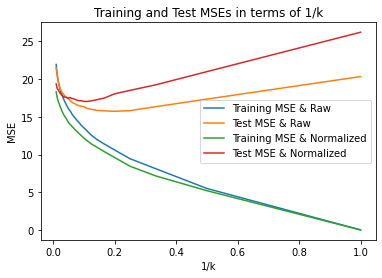

In [22]:
k_values_reciprocal = 1/k_values
fig, ax = plt.subplots()
ax.plot(k_values_reciprocal, mses_train, label='Training MSE & Raw')
ax.plot(k_values_reciprocal, mses_test, label='Test MSE & Raw')
ax.plot(k_values_reciprocal, mses_train_normal, label='Training MSE & Normalized')
ax.plot(k_values_reciprocal, mses_test_normal, label='Test MSE & Normalized')
ax.set_xlabel('1/k')
ax.set_ylabel('MSE')
ax.set_title('Training and Test MSEs in terms of 1/k')
ax.legend()

### (j) Compare the results of KNN Regression with the linear regression model that has the smallest test error and provide your analysis.

**ANSWER**: Since the smallest test MSE we get using Linear Regression is 19.221018954925775 and the smallest test MSE we get using KNN Regression is 15.726819842563568 with k=5 and raw features, KNN Regression performs better in this task. (The random_state parameter I use when I split the data set is 42, which is the number same as the example in the official documantation. Using different random states may cause different results.)


Analysis: KNN Regression is a flexible method and RL is a inflexible method. In this case, there are two advantages for KNN Regression. First, the sample size is large and the number of predictors is small. With a large sample size, a flexible method is less likely to overfit while it tends to reduce bias. Second, the relationship between the predictors and response is significantly non-linear. A flexible method helps to find the non-linear effect. 

## 2. ISLR: 2.4.1

### (a) The sample size n is extremely large, and the number of predictors p is small.

**ANSWER**: A flexible statistical learning method is **better**. As we know, a flexible method tends to reduce the bias but it may cause overfitting. However, a large sample size makes it less likely to overfit and that is good for a flexible method.

### (b) The number of predictors p is extremely large, and the number of observations n is small.

**ANSWER**: A flexible statistical learning method is **worse**. When the number of observations is small, it is easy for a flexible method to cause overfitting, which usually leads to a larger variance and a small reduction in bias.

### (c) The relationship between the predictors and response is highly non-linear.

**ANSWER**: A flexible statistical learning method is **better**. A flexible method helps to find the non-linear effect while an inflexible method cannot.

### (d) The variance of the error terms, i.e. σ2 = Var(ε), is extremely high.

**ANSWER**: A flexible statistical learning method is **worse**. A flexible method will be hugely influenced by noise if the variance of the error terms is high while an inflexible method will be influenced less.

## 3. ISLR: 2.4.7

### (a) Compute the Euclidean distance between each observation and the test point, X1=X2=X3=0.

**ANSWER**:

Between Obs.1 and the test point: $ED_1=\sqrt{(3-0)^2}=3$

Between Obs.2 and the test point: $ED_2=\sqrt{(2-0)^2}=2$

Between Obs.3 and the test point: $ED_3=\sqrt{(1-0)^2+(3-0)^2}=\sqrt{10}$

Between Obs.4 and the test point: $ED_4=\sqrt{(1-0)^2+(2-0)^2}=\sqrt{5}$
 
Between Obs.5 and the test point: $ED_5=\sqrt{(-1-0)^2+(1-0)^2}=\sqrt{2}$

Between Obs.6 and the test point: $ED_6=\sqrt{(1-0)^2+(1-0)^2+(1-0)^2}=\sqrt{3}$

### (b) What is our prediction with K = 1? Why?

**ANSWER**: **Green**. K=1 means to choose the nearest data point and pick its label. In this case, the nearest one is Obs.5 and its label is Green. 

### (c) What is our prediction with K = 3? Why?

**ANSWER**: **Red**. K=3 means to choose 3 nearest data points and in this case they are Obs.2 (Red),  Obs.5 (Green), and Obs.6 (Red). Using majority polling, the result should be red. 

### (d) If the Bayes decision boundary in this problem is highly non-linear, then would we expect the best value for K to be large or small? Why?

**ANSWER**: We expect the best K to be **small**. If the boundary is highly non-linear, we need a smaller k to fit the data points flexibly and find the non-linear effect. 

## References and Citations

#### 1. pandas.DataFrame.describe
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html

#### 2. Pandas Apply
https://www.datacamp.com/community/tutorials/pandas-apply

#### 3. statsmodels: Linear Regression
https://www.statsmodels.org/stable/regression.html

#### 4. Find Outliers
https://stackoverflow.com/questions/46304514/access-standardized-residuals-cooks-values-hatvalues-leverage-etc-easily-i
https://blog.csdn.net/weixin_35757704/article/details/114776671

#### 5. sklearn.preprocessing.PolynomialFeatures
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html

#### 6. sklearn.model_selection.train_test_split
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

#### 7. statsmodels.tools.eval_measures.mse
https://www.statsmodels.org/stable/generated/statsmodels.tools.eval_measures.mse.html

#### 8. sklearn.neighbors.KNeighborsRegressor
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsRegressor.html

#### 9. Normalize Features
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html

#### 10. Flexible Method vs Inflexible Method
https://masterr.org/da/when-does-a-flexible-model-beat-an-inflexible-one-and-vice-versa/#:~:text=A%20flexible%20model%20will%20perform%20better%20in%20general%20because%20it,large%20variance%20of%20the%20errors.